In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import scipy
import plotly as py
import plotly.graph_objs as go
from matplotlib.widgets import Slider
import scipy.stats as stats
import plotly.graph_objs as go

%matplotlib inline
%matplotlib widget


In [3]:
df = pd.read_csv("dubai_properties.csv")

In [4]:
df_copy = df.copy()
df_part = df_copy.iloc[0:10000, :]

In [5]:
df_part.shape

(10000, 17)

### 2. Привести описание датасета

#### Датасет содержит данные об арендуемой недвижимости в Дубае.
#### Цель - прогнозирование тенденций на рынке аренды

| Признак | Описание | Единицы измерения |
|:-------:|:--------:|:-----------------:|
| Address | Полный адрес объекта недвижимости | address |
| Rent | Годовая стоимость аренды | Dirhams |
| Beds | Количество спален в доме | pc |
| Baths | Количество ванных комнат в доме| pc |
| Type | Тип недвижимости | apartament, villa, penthouse |
| Area_in_sqft | Общая площадь объекта | foot^2 | 
| Rent_per_sqft | Арендная плата за квадратный фут| Dirham/foot^2 |
| Rent_category | Классификация арендной платы по категориям| Low, Medium, High |
| Frequency | Периодичность внесения арендной платы | Yearly |
| Furnishing | Состояние меблировки объекта | Furnised, Unfurnised |
| Purpose | Цель объявления, как правило | For rent | 
| Posted_date | Дата, когда недвижимость была сдана в аренду | yyyy.mm.dd |
| Age_of_listing_in_days | Количество дней, в течение которых объявление было активно с момента его публикации | numbers day |
| Location | Более конкретное местоположение в пределах города, где находится недвижимость | specific_location |
| City | Город, в котором находится недвижимость | city | 
| Latitude, Longitude | Географические координаты объекта недвижимости | Latitude, Longitude |



In [7]:
df_part.head(5)

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,2024-03-07,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,2024-03-08,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,2024-03-21,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,2024-02-24,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,2024-02-16,65,Yas Island,Abu Dhabi,24.494022,54.607372


In [8]:
df_group = df_part.groupby("Location").agg({"Rent": "mean", "Rent_per_sqft": "mean"}).reset_index()
print(df_group)

                               Location           Rent  Rent_per_sqft
0   Abu Dhabi Gate City (Officers City)  299999.875000      65.443784
1                        Airport Street   69052.847059      48.303650
2                               Al Aman  135000.000000      29.585799
3                              Al Bahia  103924.528302      28.526241
4                             Al Bateen  205927.167832      75.398286
..                                  ...            ...            ...
81                           The Marina  233906.918605     136.073493
82              Tourist Club Area (TCA)   93571.688119      55.952185
83                           Yas Island  159465.389635      97.106800
84                           Zayed City  189642.857143      37.335974
85                    Zayed Sports City  126666.666667      69.851114

[86 rows x 3 columns]


### 3. matplotlib
#### 3.1 Построить несколько графиков разного вида с использованием matplotlib.

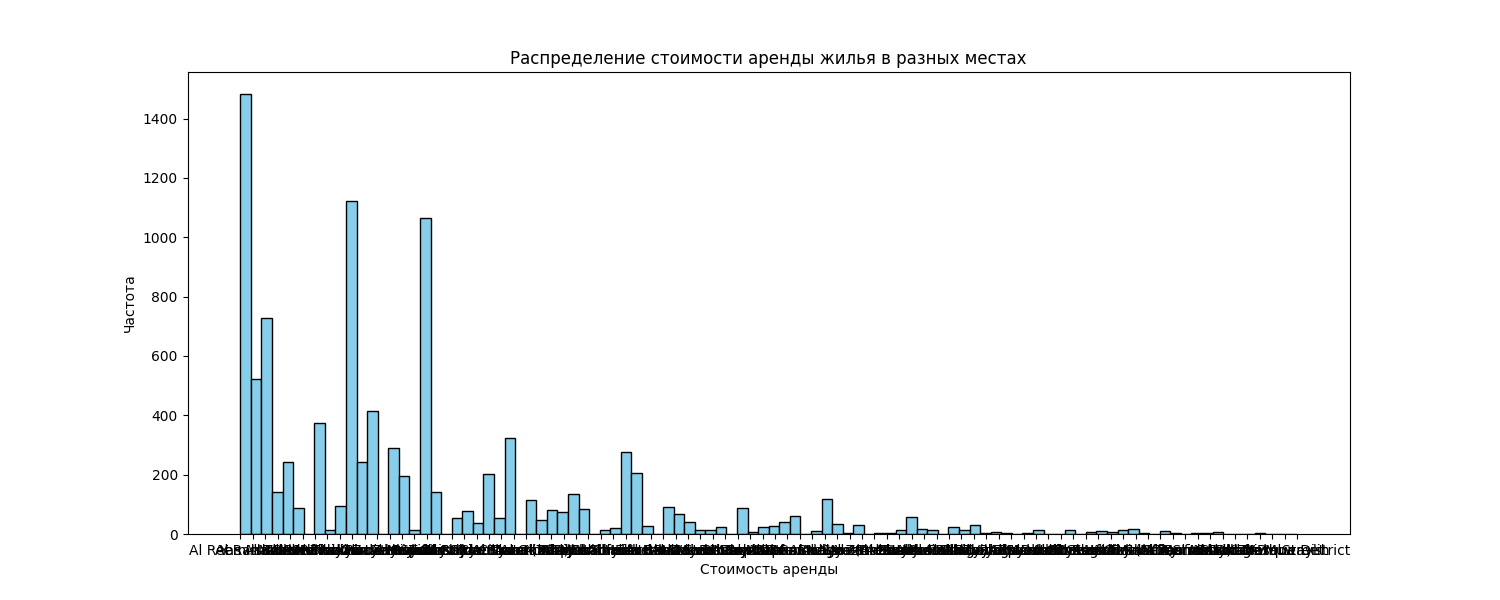

In [9]:
plt.figure(figsize=(15, 6))
plt.hist(df_part['Location'], bins=100, color='skyblue', edgecolor='black')

# Добавляем заголовок и подписи осей
plt.title('Распределение стоимости аренды жилья в разных местах')
plt.xlabel('Стоимость аренды')
plt.ylabel('Частота')

# Отображаем график
plt.show()

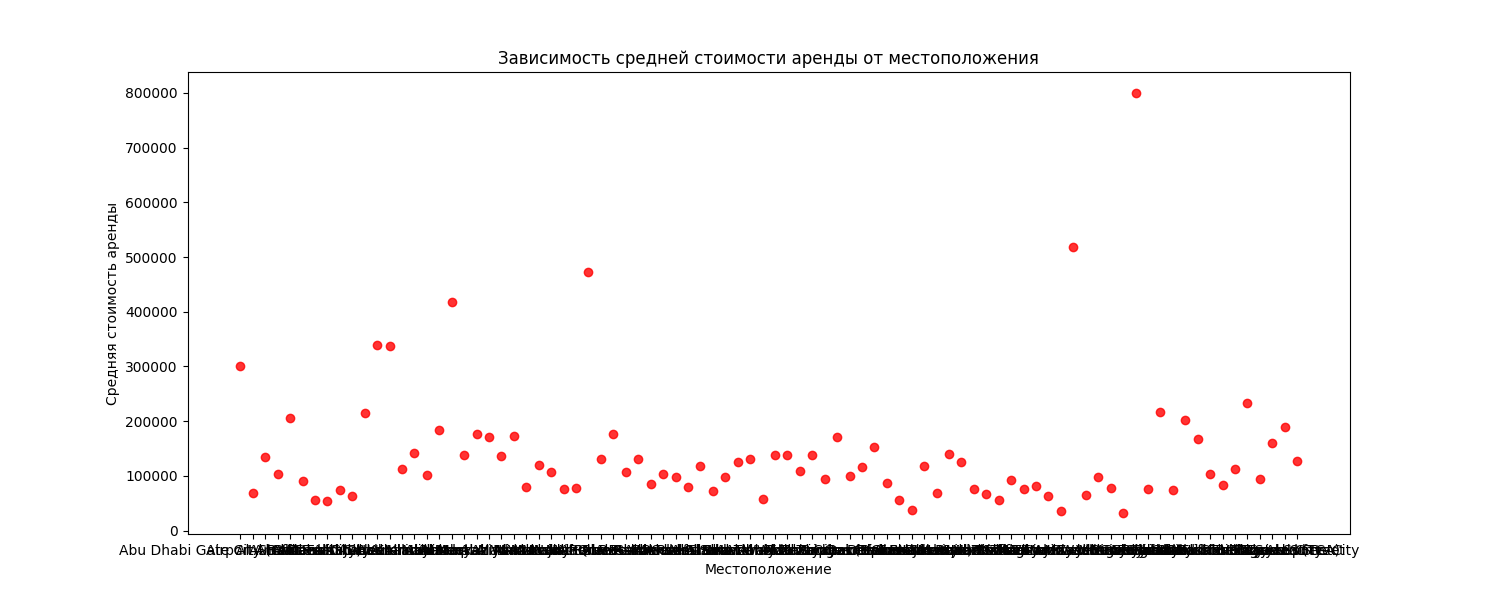

In [10]:
plt.figure(figsize=(15, 6))
plt.scatter(df_group['Location'], df_group['Rent'], color='red', alpha=0.8)

# Добавляем заголовок и подписи осей
plt.title('Зависимость средней стоимости аренды от местоположения')
plt.xlabel('Местоположение')
plt.ylabel('Средняя стоимость аренды')

# Отображаем график
plt.show()

### 3.2 Построить несколько суб.графиков на одном графике используя .subplot

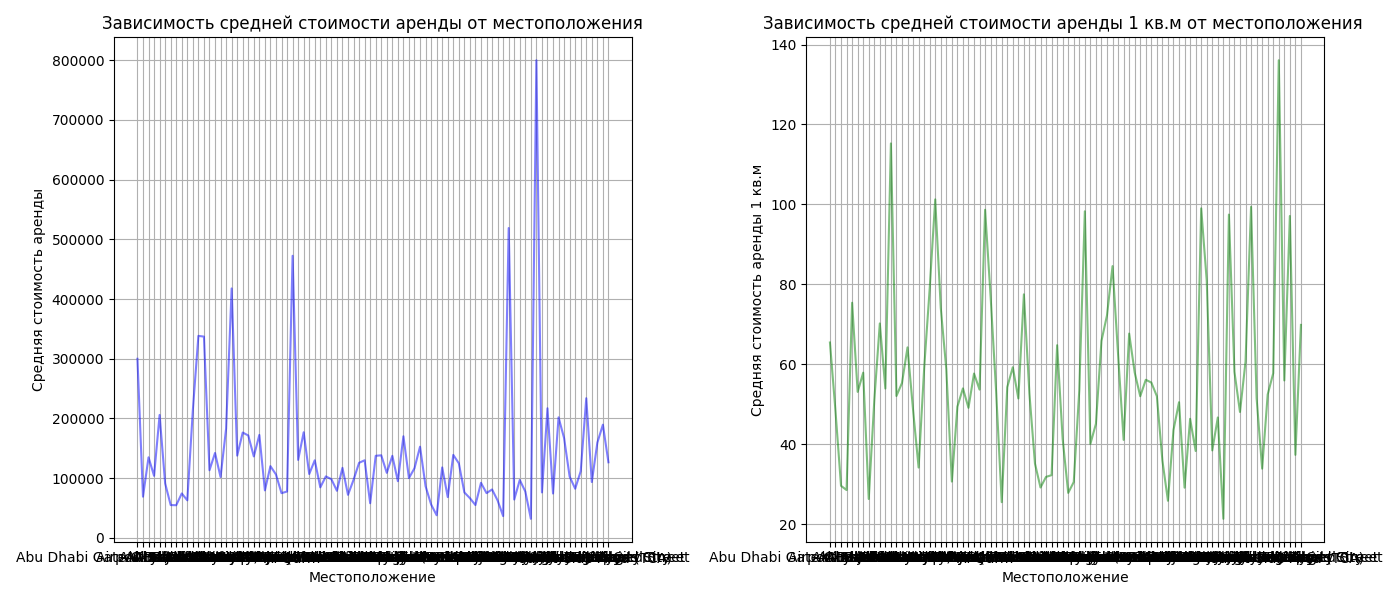

In [11]:
# Создаем фигуру и оси для двух графиков
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# График зависимости рейтинга компании от средней заработной платы
axs[0].plot(df_group['Location'], df_group['Rent'], alpha=0.5, color='blue')
axs[0].set_title('Зависимость средней стоимости аренды от местоположения')
axs[0].set_xlabel('Местоположение')
axs[0].set_ylabel('Средняя стоимость аренды')
axs[0].grid()

# График зависимости рейтинга компании от количества проведенных собеседований
axs[1].plot(df_group['Location'], df_group['Rent_per_sqft'], alpha=0.5, color='green')
axs[1].set_title('Зависимость средней стоимости аренды 1 кв.м от местоположения ')
axs[1].set_xlabel('Местоположение')
axs[1].set_ylabel('Средняя стоимость аренды 1 кв.м')
axs[1].grid()

# Отображаем графики
plt.tight_layout()
plt.show()

In [12]:
df_group_ = df_part.groupby("Area_in_sqft").agg({"Rent": "mean", "Rent_per_sqft": "mean"}).reset_index()
print(df_group_)

      Area_in_sqft          Rent  Rent_per_sqft
0              150  2.433333e+04     162.222222
1              200  2.555500e+04     127.775000
2              248  6.000000e+04     241.935484
3              250  2.416633e+04      96.665333
4              255  2.199900e+04      86.270588
...            ...           ...            ...
1958         40000  2.466667e+05       6.166667
1959         43000  1.500000e+05       3.488372
1960         50000  2.800000e+06      56.000000
1961         75000  1.250000e+05       1.666667
1962        113500  2.400000e+05       2.114537

[1963 rows x 3 columns]


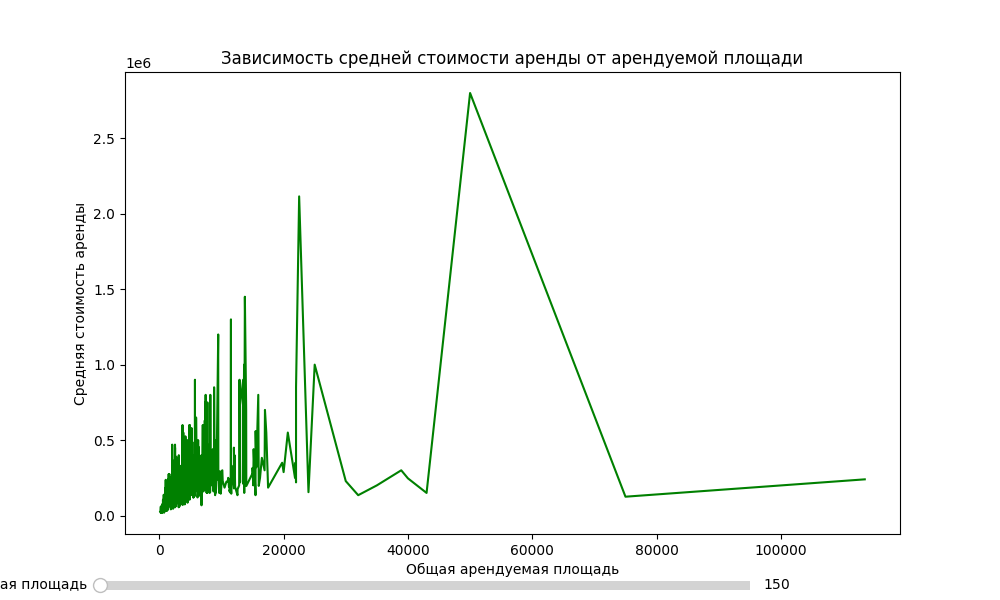

In [13]:
# Создание основного графика
fig, ax = plt.subplots(figsize=(10, 6))
scatter, = ax.plot(df_group_['Area_in_sqft'], df_group_['Rent'], color='green')
plt.xlabel('Общая арендуемая площадь')
plt.ylabel('Средняя стоимость аренды')
plt.title('Зависимость средней стоимости аренды от арендуемой площади')

# Создание слайдера для выбора рейтинга
ax_slider = plt.axes([0.1, 0.01, 0.65, 0.03])
slider = Slider(ax_slider, 'Общая арендуемая площадь', df_group_['Area_in_sqft'].min(), df_group_['Area_in_sqft'].max(), valinit=df_group_['Area_in_sqft'].min())

# Функция для обновления графика при изменении значения слайдера
def update(val):
    filtered_data = df_group_[df_group_['Area_in_sqft'] <= slider.val]
    scatter.set_xdata(filtered_data['Area_in_sqft'])
    scatter.set_ydata(filtered_data['Rent'])
    ax.set_title('Зависимость средней стоимости аренды от арендуемой площади (до {:.2f})'.format(slider.val))
    fig.canvas.draw_idle()

# Подключение функции к слайдеру
slider.on_changed(update)

plt.show()


### 4.1 Построить 3 разных вида графиков с использованием pandas.DataFrame.plot/Series.plot

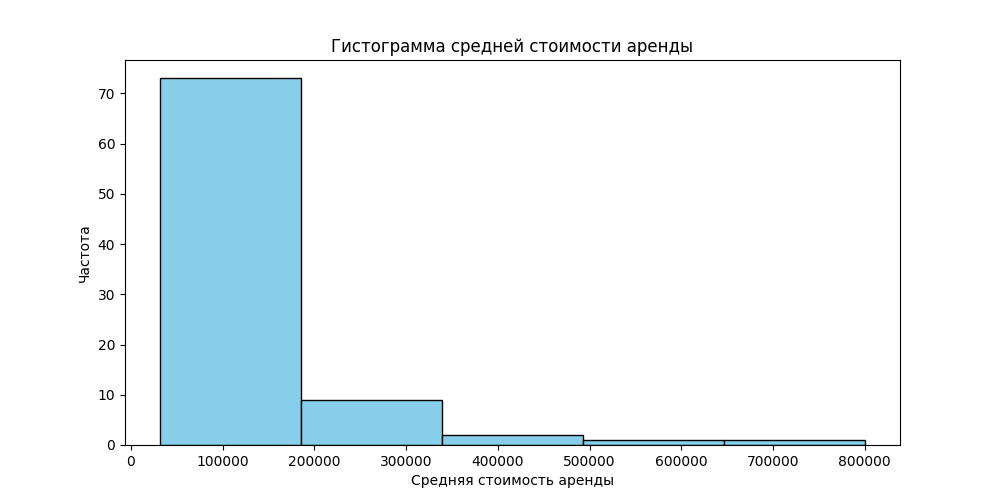

In [14]:
# График 1: Гистограмма средних зарплат
plt.figure(figsize=(10, 5))
df_group['Rent'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')
plt.title('Гистограмма средней стоимости аренды')
plt.xlabel('Средняя стоимость аренды')
plt.ylabel('Частота')
plt.show()

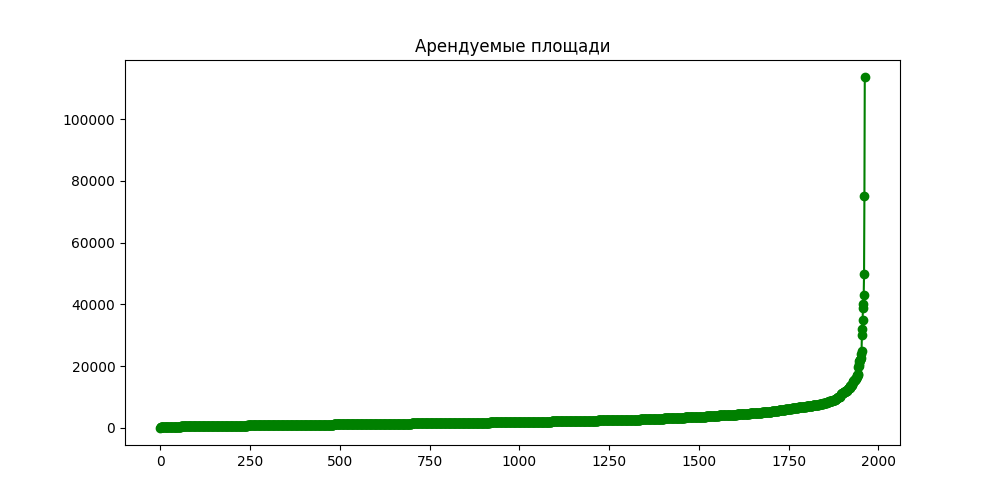

In [15]:
plt.figure(figsize=(10, 5))
df_group_['Area_in_sqft'].plot(kind='line', marker='o', color='green')
plt.title('Арендуемые площади')
plt.show()

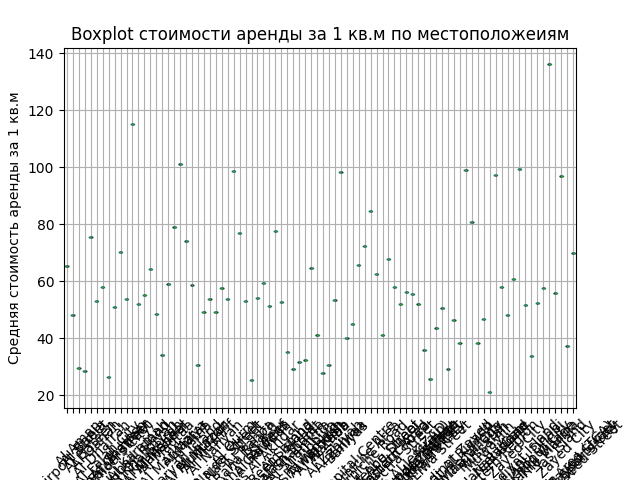

In [16]:
# График 3: Boxplot рейтингов по отраслям
df_group.boxplot(column='Rent_per_sqft', by='Location')
plt.title('Boxplot стоимости аренды за 1 кв.м по местоположеиям')
plt.suptitle('')
plt.xlabel('Местоположения')
plt.ylabel('Средняя стоимость аренды за 1 кв.м')
plt.xticks(rotation=45)
plt.show()

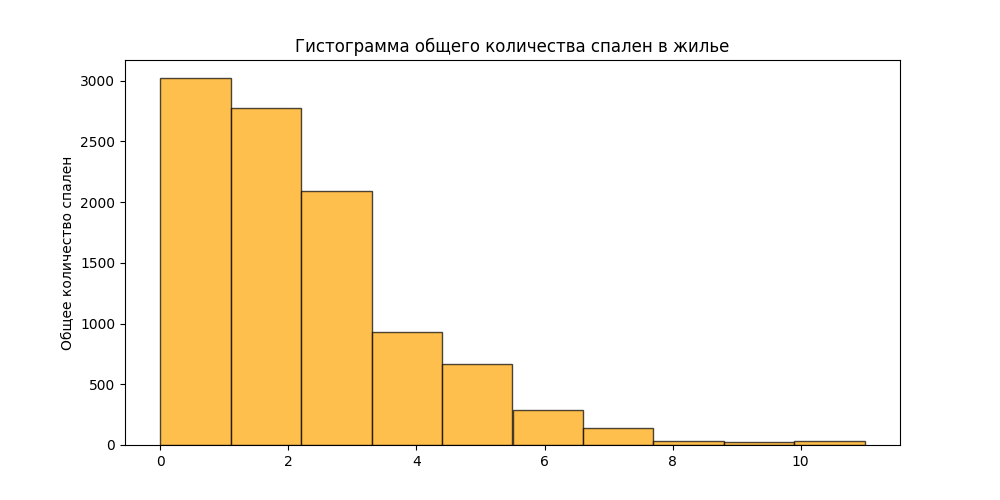

In [17]:
plt.figure(figsize=(10, 5))
df_part['Beds'].plot(kind='hist', bins=10, color='orange', alpha=0.7, edgecolor = 'black')
plt.title('Гистограмма общего количества спален в жилье')
plt.ylabel('Общее количество спален')
plt.show()

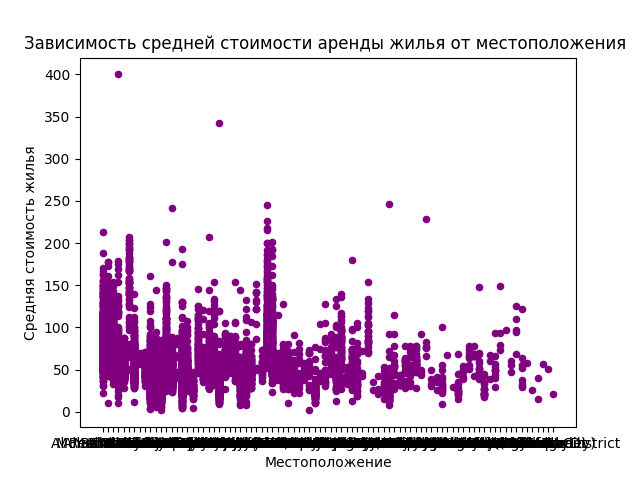

In [18]:
# График 5: Точечный график зависимости рейтингов от средней зарплаты
df_part.plot.scatter(x='Location', y='Rent_per_sqft', color='purple')
plt.title('Зависимость средней стоимости аренды жилья от местоположения ')
plt.xlabel('Местоположение')
plt.ylabel('Средняя стоимость жилья')
plt.show()

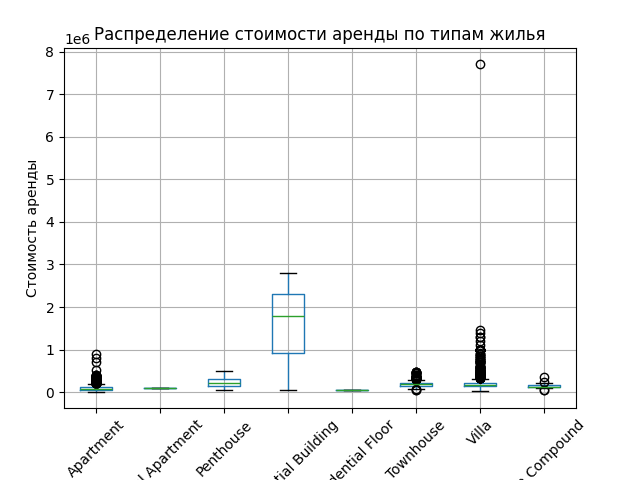

In [19]:
# График 6: Boxplot общего количества отзывов по рейтинга
df_part.boxplot(column='Rent', by='Type')
plt.title('Распределение стоимости аренды по типам жилья')
plt.suptitle('')
plt.xlabel('Тип жилья')
plt.ylabel('Стоимость аренды')
plt.xticks(rotation=45)
plt.show()

### 5. Seaborn
#### 5.1 Построить .pairplot на каком-либо наборе данных, проанализировать взаимосвязь набора числовых признаков.

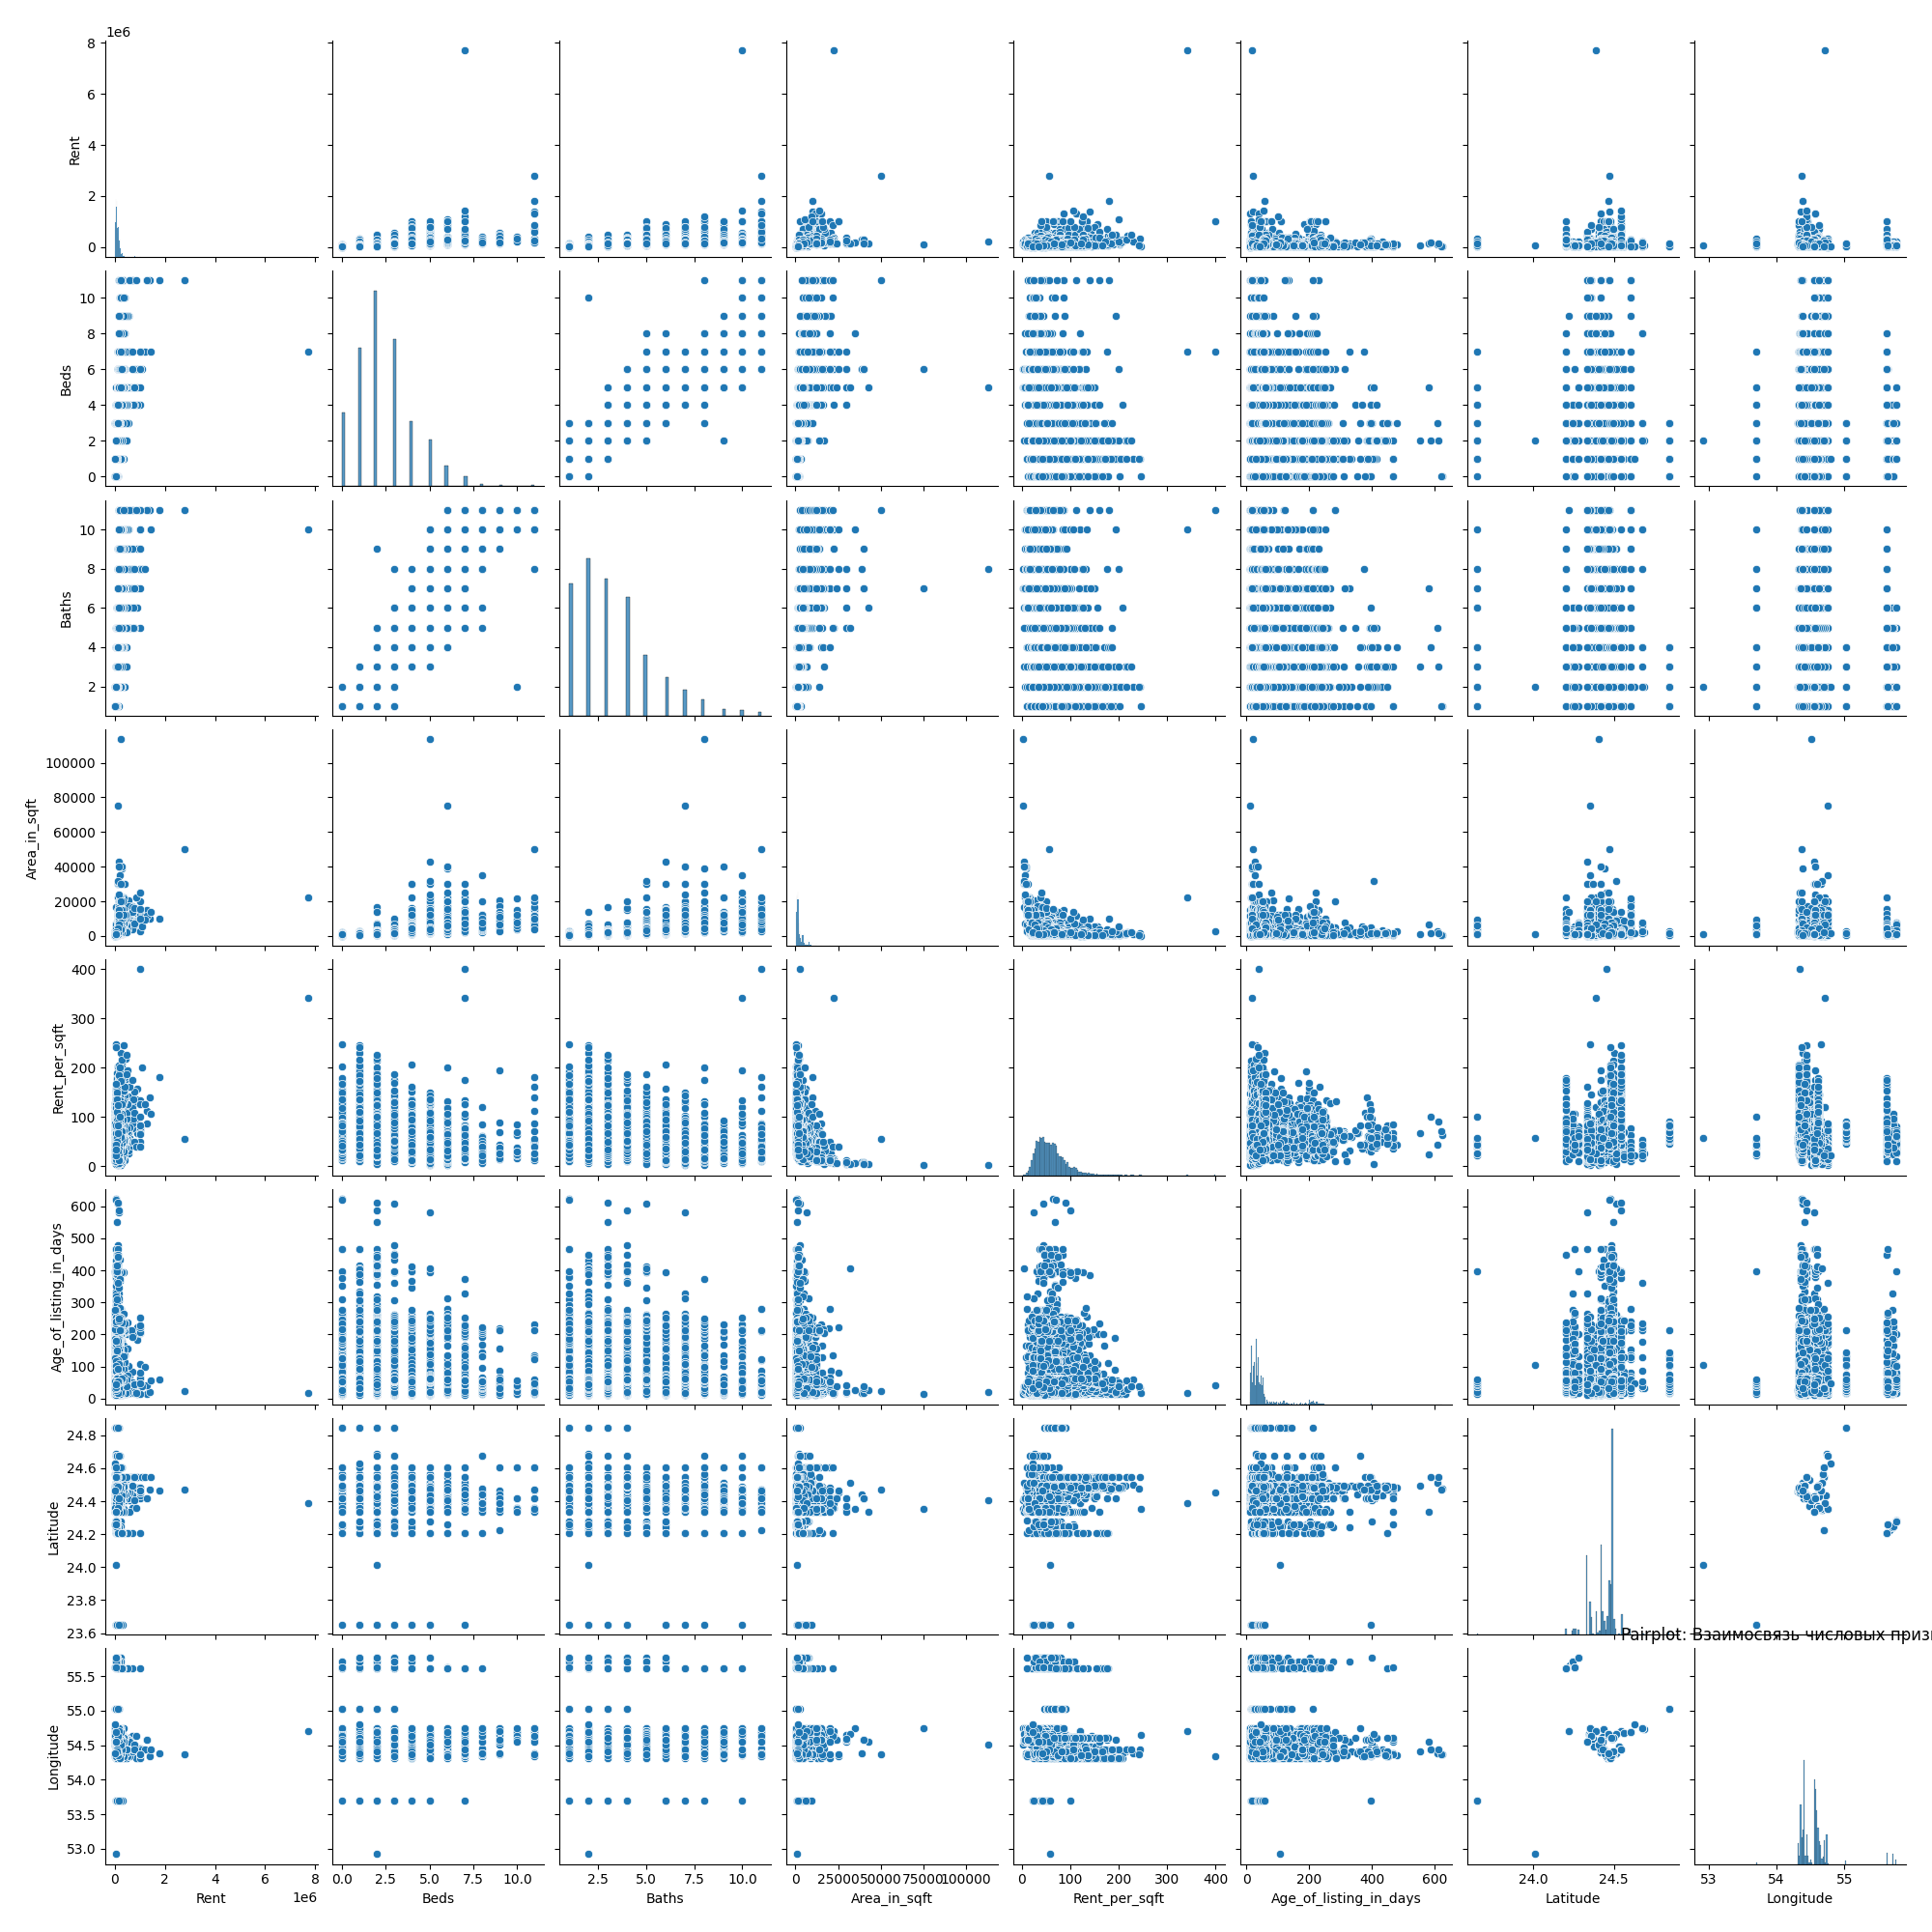

In [20]:
# Построение pairplot
sns.pairplot(df_part)
plt.title('Pairplot: Взаимосвязь числовых признаков')
plt.show()

### 5.2 Построить .jointplot, проанализировать взаимосвязь двух конкретных числовых признаков.

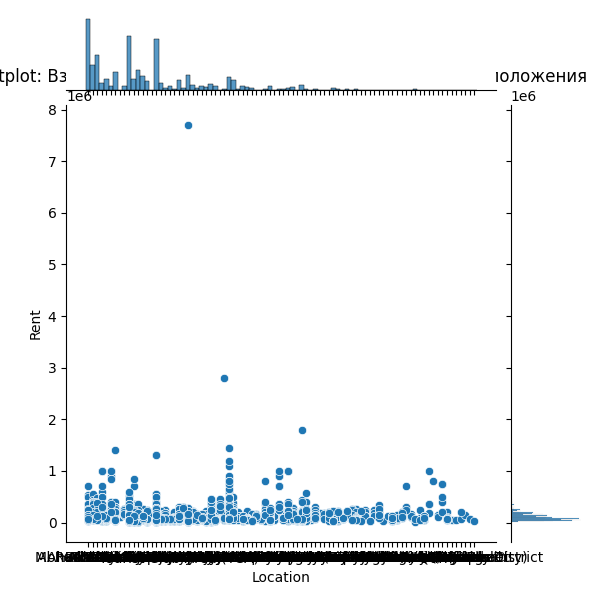

In [21]:
# Построение jointplot
sns.jointplot(x='Location', y='Rent', data=df_part, kind='scatter')
plt.title('Jointplot: Взаимосвязь средней стоимости аренды от местоположения ')
plt.show()

### 5.3 Построить .boxplot и/или .violinplot на каком-либо наборе данных, проанализировать числовой признак в разрезе категориального.

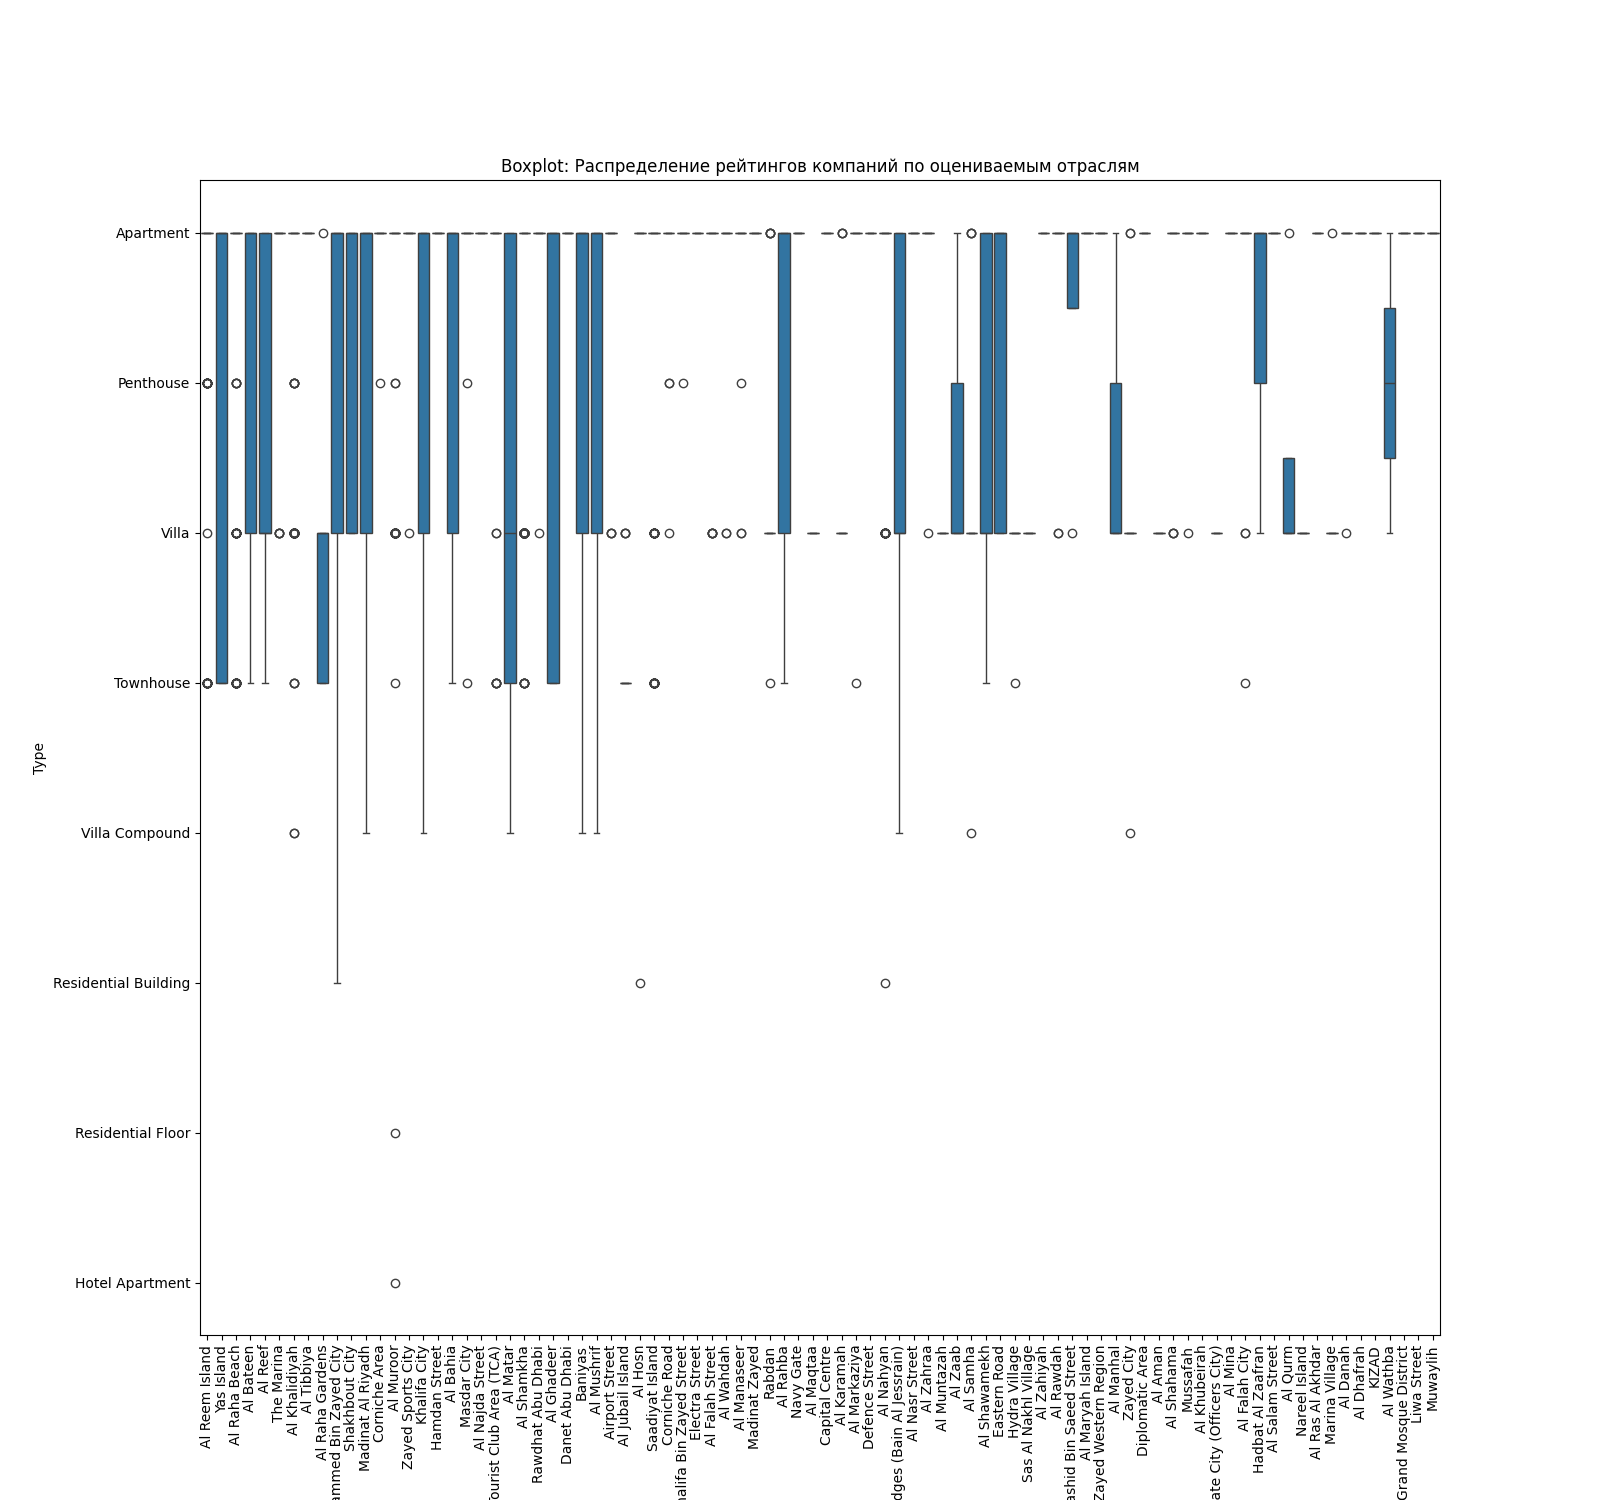

In [22]:
# Построение boxplot
plt.figure(figsize=(16, 15))
sns.boxplot(x='Location', y='Type', data=df_part)
plt.title('Boxplot: Распределение рейтингов компаний по оцениваемым отраслям')
plt.xticks(rotation=90)
plt.show()

### 5.4 Построить график .heatmap попарной корреляции всех числовых признаков.

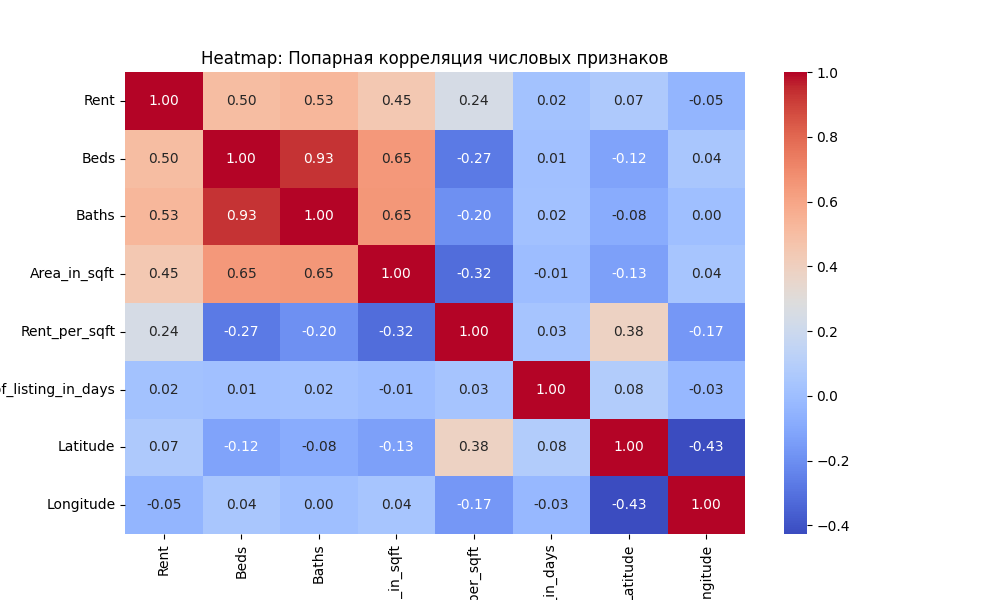

In [23]:
# Убираем категориальные признаки для построения heatmap
numeric_df = df_part.select_dtypes(include=['float64', 'int64'])

# Построение heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap: Попарная корреляция числовых признаков')
plt.show()

### 6. scipy.stats
### 6.1 Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению.

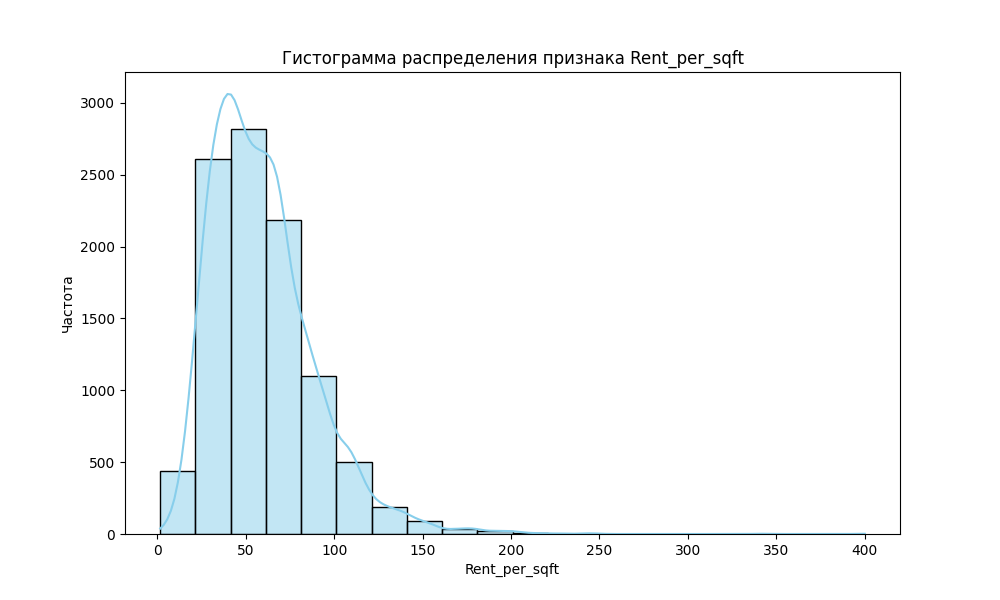

In [25]:
# Выбираем числовой признак для анализа
numeric_feature = 'Rent_per_sqft'

# Строим гистограмму для числового признака
plt.figure(figsize=(10, 6))
sns.histplot(df_part[numeric_feature], kde=True, color='skyblue', bins=20)
plt.title(f'Гистограмма распределения признака {numeric_feature}')
plt.xlabel(numeric_feature)
plt.ylabel('Частота')
plt.show()

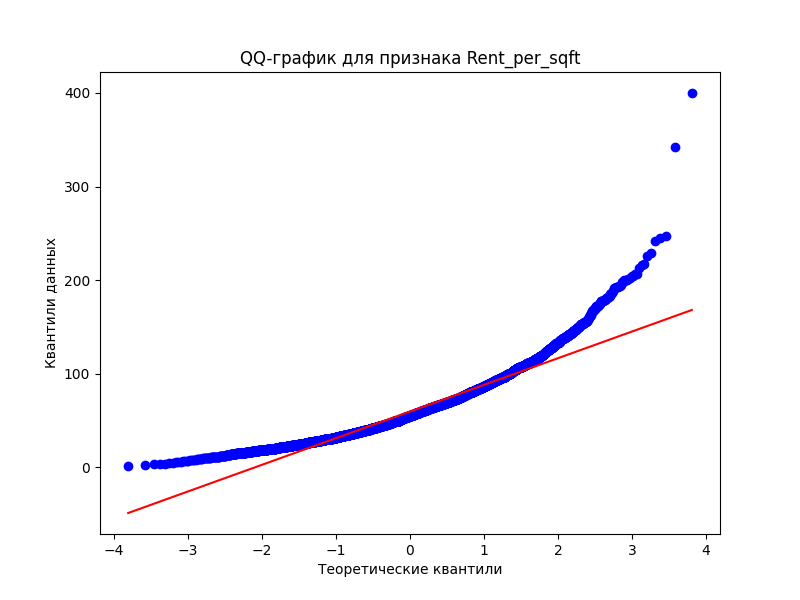

In [26]:
# Строим QQ-график для числового признака
plt.figure(figsize=(8, 6))
stats.probplot(df_part[numeric_feature], dist="norm", plot=plt)
plt.title(f'QQ-график для признака {numeric_feature}')
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили данных')
plt.show()

### 7. plotly
#### 7.1 Построить несколько графиков разного вида.

In [28]:
# График-круговая диаграмма распределения рейтингов
fig1 = go.Figure(data=[go.Pie(labels=df_part['Type'].value_counts().index, 
                               values=df_part['Rent'].value_counts().values)])
fig1.update_layout(title_text='Круговая диаграмма: Распределение стоимости аренды по типу жилья')

# График-столбчатая диаграмма распределения рейтингов
fig2 = go.Figure(data=[go.Bar(x=df_part['Type'].value_counts().index, 
                              y=df_part['Rent'].value_counts().values)])
fig2.update_layout(title_text='Столбчатая диаграмма: Распределение стоимости аренды по типу жилья',
                   xaxis_title='Площадь жилья', yaxis_title='Стоимость аренды')

# График-гистограмма распределения средней заработной платы
fig3 = go.Figure(data=[go.Histogram(x=df_part['Rent'])])
fig3.update_layout(title_text='Гистограмма: Распределение средней стоимости аренды')

fig1.show()
fig2.show()
fig3.show()

### 7.2 Построить несколько суб-графиков на одном графике.

In [30]:
# Создание суб-графиков
trace1 = go.Scatter(x=df['Rent'], y=df['Location'], mode='markers', name='Rent vs Location')
trace2 = go.Scatter(x=df['Area_in_sqft'], y=df['Location'], mode='markers', name='Area_in_sqft vs Location')

# Объединение суб-графиков на одном графике
fig = go.Figure(data=[trace1, trace2])
fig.update_layout(title='Суб-графики: Rent vs Location & Area_in_sqft')

### 7.3 Построить интерактивный график.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_group_['Area_in_sqft'], y=df_group_['Rent'], mode='lines', name='Rent vs Area_in_sqft'))

# Создание слайдеров для изменения границ графика
min_rating = min(df_group_['Area_in_sqft'])
max_rating = max(df_group_['Area_in_sqft'])
rating_step = (max_rating - min_rating) / 10  # 10 шагов для границы справа
steps_right = [{'method': 'relayout', 'args': ['xaxis.range', [min_rating, max_rating]], 'label': 'Reset'}]
steps_right += [{'method': 'relayout', 'args': ['xaxis.range', [min_rating, s]], 'label': f'{s}'} for s in np.arange(min_rating, max_rating, 0.1)]

min_salary = min(df_group['Rent'])
max_salary = max(df_group['Rent'])
salary_step = (max_salary - min_salary) / 100  # 10 шагов для границы слева
steps_left = [{'method': 'relayout', 'args': ['yaxis.range', [min_salary, max_salary]], 'label': 'Reset'}]
steps_left += [{'method': 'relayout', 'args': ['yaxis.range', [min_salary, s]], 'label': f'{s}'} for s in np.arange(min_salary, max_salary, salary_step)]

fig.update_layout(title='Интерактивный график: Area_in_sqft vs Rent',
                  xaxis_title='Общая арендуемая площадь',
                  yaxis_title='Стоимость Аренды',
                  width=1500,  # Установка ширины графика
                  height=1000,  # Установка высоты графика
                  sliders=[{'steps': steps_right, 'currentvalue': {'prefix': 'Граница справа: '}, 'active': 1,'x' : 0, 'y': 0, 'len': 0.8},
                           {'steps': steps_left, 'currentvalue': {'prefix': 'Граница слева: '}, 'active': 1,'x': 0, 'y': -0.15, 'len': 0.8}])

fig.show()